In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as sla, optimize as opt
import matplotlib as mpl

params = {'image.aspect':'equal',
          'savefig.dpi':600,
          'axes.grid':True,
          'font.size':12,
          'text.color':'black',
          'text.usetex':True,
          'image.cmap':'viridis'}

mpl.rcParams.update(params)

# General Flow of CP code

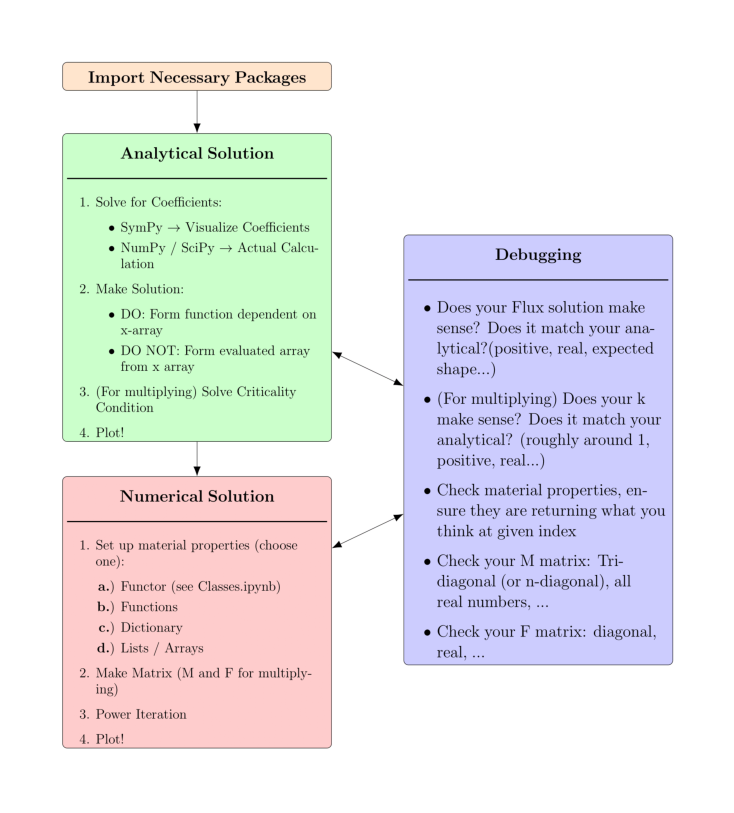

In [16]:
fig = plt.imread('flow.png')
plt.figure(dpi=600, figsize=(5, 1.5)) #remove this to make bigger
plt.imshow(fig)
plt.grid(False)
plt.ylim(1750,70)
plt.xlim(30, 1520)
plt.axis("off")
plt.show()

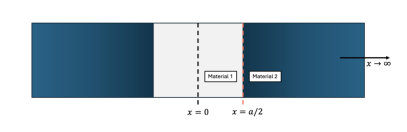

In [3]:
fig = plt.imread('hw4q3pb.png')
plt.figure(figsize=(5, 1.5)) #remove this to make bigger
plt.imshow(fig)
plt.grid(False)
plt.axis("off")
plt.show()

# Using NumPy / SciPy to Solve for Analytical Coefficients

## General Solutions
$$ \phi_1(x) = C_1\sinh(\frac{x}{L}) + C_2\cosh(\frac{x}{L}) + \frac{SL^2}{D}$$
$$ \phi_2(x) = C_3e^{\frac{x}{L}} + C_4e^{\frac{-x}{L}} $$

## Boundary Conditions
$$ \nabla \phi_1(0) = 0 \quad\quad\rightarrow\quad\quad \frac{C_1}{L}\cosh(0) + \frac{C_2}{L}\sinh(0) = 0$$

$$ \phi_1(a/2) = \phi_2(a/2) \quad\quad\rightarrow\quad\quad C_1\sinh(x_i) + C_2\cosh(x_i) - C_3e^{x_i} - C_4e^{-x_i} =  -\frac{SL^2}{D}$$

$$ -D_1\nabla\phi_1(a/2) = -D_2\nabla\phi_2(a/2) \quad\quad\rightarrow\quad\quad \frac{-D_1C_1}{L}\cosh(x_i) + \frac{-D_1C_2}{L}\sinh(x_i) + \frac{-D_2C_3}{L}e^{x_i} + \frac{-D_2C_4}{L}e^{-x_i} = 0$$

$$ \phi_2(\infty) = 0 \quad\quad\rightarrow\quad\quad C_3e^{\infty} + C_4e^{-\infty} = 0$$

In [23]:
#arbitrary numbers
a, L1, L2 = 20, 5, 3
D1, D2 = 1.7, 1
S = 1e10
x_i = a/2

LHS = np.array(
    [[np.cosh(0), np.sinh(0), 0, 0],
    [np.sinh(x_i/L1), np.cosh(x_i/L1), 0, -np.exp(-x_i/L2)],
    [-D1 / L1 * np.cosh(x_i/L1), -D1 / L1 * np.sinh(x_i/L1), 0, -D2 / L2 * np.exp(-x_i/L2)],
    [0, 0, 1, 0]])

RHS = np.array(
    [0,
     -S * L1**2 / D1,
     0,
     0
    ])

In [26]:
c1, c2, c3, c4 = sla.solve(LHS, RHS)
def phi1(x):
    return c1 * np.sinh(x/L1) + c2 * np.cosh(x/L2) + S*L1**2 / D1

def phi2(x):
    return c3 * np.exp(x/L2) + c4 * np.exp(-x/L2)

def phi(x):
    if x< a/2:
        return phi1(x)
    else:
        return phi2(x)
        
x = np.linspace(0,40, 1000)
y = [phi(_x) for _x in x]

plt.plot(x,y)
plt.close()

# Setting Up Finite-Difference Matrix

# Power Iteration

# Solving Transcendental Criticality Condition

Criticality condition:

$$ B\cos(B) = 0 $$

$$ B^2 = \frac{\Sigma_a - \frac{1}{k}\nu\Sigma_f}{D} $$

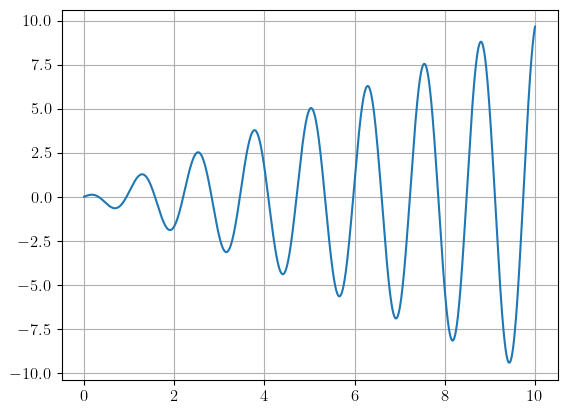

In [5]:
#recall scipy.optimize = opt

def crit(k):
    return np.cos(k*5)*k

#lets plot this condition

ks = np.linspace(0, 10, 1000)
plt.plot(ks, crit(ks))

To find the root, use `scipy.optimize.root` (simpler) or jointly with `scipy.optimize.minimize` (harder).

Function signatures:

`root(fun, x0)`

`minimize(fun, x0, bounds)`

In [14]:
opt.root(fun = crit, x0 = 1)

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.731e-16]
       x: [ 9.425e-01]
  method: hybr
    nfev: 9
    fjac: [[-1.000e+00]]
       r: [-4.712e+00]
     qtf: [-4.680e-11]

In [15]:
def min_crit(k):
    return np.abs(k)

opt.minimize(fun = min_crit, x0 = 1, bounds = [ (0,2) ])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00]
      nit: 1
      jac: [ 1.000e+00]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>